In [ ]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pylab as plt
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -U kaleido

In [ ]:
def plot3d_error(eij, maxError,X, Y,  t_tensor):

  fig = go.Figure()

  for i in range(0, dimZ, 90):
      #= t[i]
      _z_ = t_tensor[i]


      fig.add_trace(
            go.Surface(
                y=_z_,
                x=X,
                z=Y,
                opacity=0.5,  # Transparencia
                surfacecolor=eij[i],  # Azul
                #showscale=False,  # Ocultar escala de colores
              showscale=True,  # Mostrar la barra de colores
              colorbar=dict(title="Error", tickvals=[0, 2, 4, 6, round(maxError,1)]),  # Escala de color entre 0 y 8
              cmin=0, cmax=8  # Rango de colores
            )
        )


  # Configurar diseño
  fig.update_layout(
      title="Planos y Scatter en función de t",
      scene=dict(
          xaxis_title="X",
          yaxis_title="tiempo",
          zaxis_title="Y",
          xaxis=dict(showgrid=True),  # Mostrar grid en X
          yaxis=dict(showgrid=True),  # Mostrar grid en Y
          zaxis=dict(showgrid=True),  # Mostrar grid en Z
          aspectratio=dict(
              x=1,  # Alargar el eje X
              y=2,  # Eje Y permanece igual
              z=1   # Eje Z permanece igual
          )
      ),
      scene_camera=dict(
        eye=dict(x=2, y=-1.3, z=1)
      )  # Ajusta el ángulo de visión
  )

  # Mostrar figura
  fig.show()
  fig.write_image("error_3D_burgers.jpg",scale=2)   # JPG

In [ ]:
# run = "Hernan"
# #/content/drive/MyDrive/Docencia/Cursos/SeminarioTrabajoGrado/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy
# if run == "Hernan":
#   path = "/content/drive/MyDrive/Docencia/Cursos/SeminarioTrabajoGrado/"#SeminarioTrabajoGrado/SeminarioTrabajoGradoAnaMaria/programas/PINNs
#   ruta = f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_tiempo.npy"
#   ruta1= f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn.npy"
#   ruta2= f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy"
#else:
ruta = "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_tiempo.npy"
ruta1= "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn.npy"
ruta2= "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy"

In [ ]:
diferenciasfinitas = np.load(ruta)
piml= np.load(ruta1)
piml1= np.load(ruta2)
np.shape(piml[499])

(40, 40)

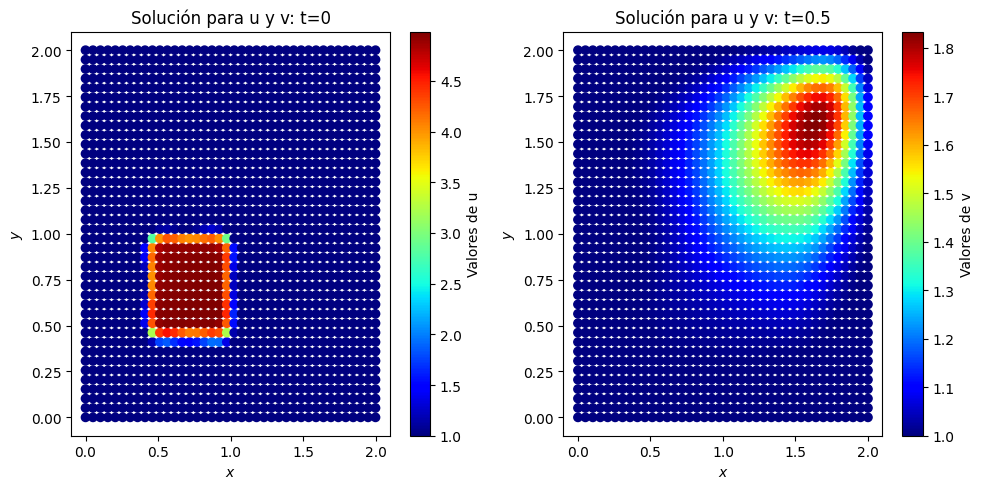

In [ ]:
# Create subplots for u and v
x = np.linspace(0, 2, 40)
y = np.linspace(0, 2, 40)

X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for u
s0=axes[0].scatter(X, Y, c=piml1[0], cmap=cm.jet,vmin=1)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Solución para u y v: t=0')
fig.colorbar(s0, ax=axes[0], label="Valores de u")

# Scatter plot for v
s1= axes[1].scatter(X, Y, c=piml1[498], cmap=cm.jet,vmin=1)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_title('Solución para u y v: t=0.5')
fig.colorbar(s1, ax=axes[1], label="Valores de v")

plt.tight_layout() # Adjusts spacing between subplots
plt.savefig('sol_burger_pinn.jpg') # Save the figure
plt.show()

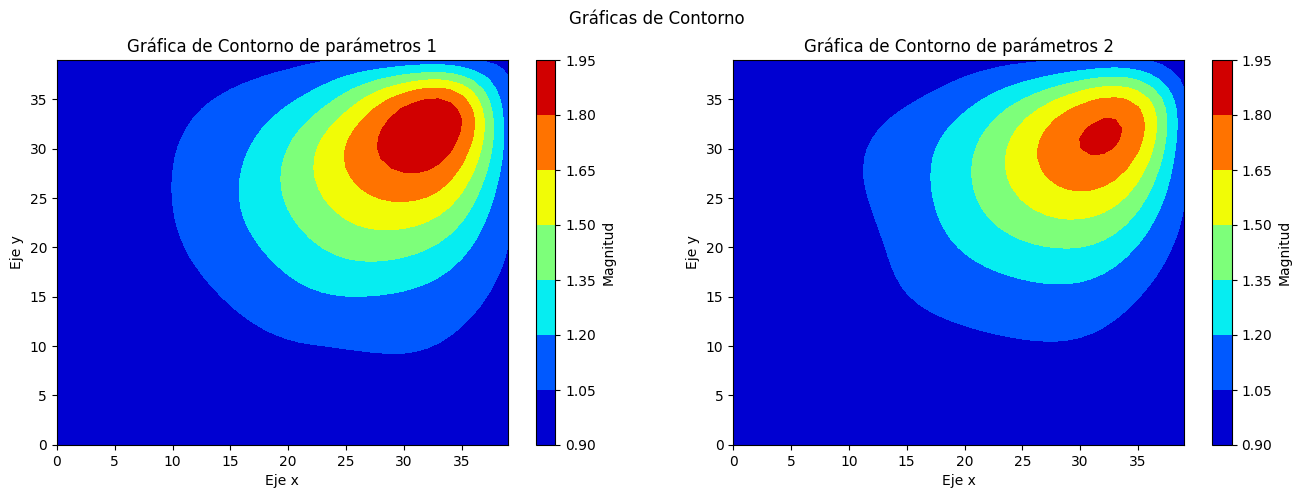

In [ ]:
# prompt: hacer la grafica de contorno de tiempo1

plt.figure(figsize=(16,5))
plt.suptitle('Gráficas de Contorno')
plt.subplot(1,2,1)
plt.contourf(piml[499], cmap='jet') #'viridis', 'plasma', 'inferno', 'magma'
plt.colorbar(label='Magnitud')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Gráfica de Contorno de parámetros 1')

plt.subplot(1,2,2)
plt.contourf(piml1[499], cmap='jet')
plt.colorbar(label='Magnitud')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Gráfica de Contorno de parámetros 2')
plt.show()


#========================================================================================


# Error relativo

Podemos definir el error por sitio asociado al campo velocidades como :



\begin{equation}
e^{i,j}(t) =   \frac{| U_{DF}^{i,j}   (t)- U_{Pinss}^{i,j}   (t) |}{U_{DF}^{i,j}(t)}
\end{equation}


\begin{equation}
Error(t) =  \left \langle e^{i,j}(t)  \right \rangle
\end{equation}



## Cálculo del error relativo


In [ ]:
def computo_error(diferenciasfinitas, piml, Ntimes=500):
  eij = abs(diferenciasfinitas - piml)*100/abs(diferenciasfinitas)
  error = np.zeros(Ntimes)
  t = np.linspace(0,0.5,  Ntimes)
  for i in range(0, 500):
    error[i] = np.mean(eij[i])
  return error, t

def computo_error_por_sitio(diferenciasfinitas, piml):
  eij = abs(diferenciasfinitas - piml)*100/abs(diferenciasfinitas)
  return eij

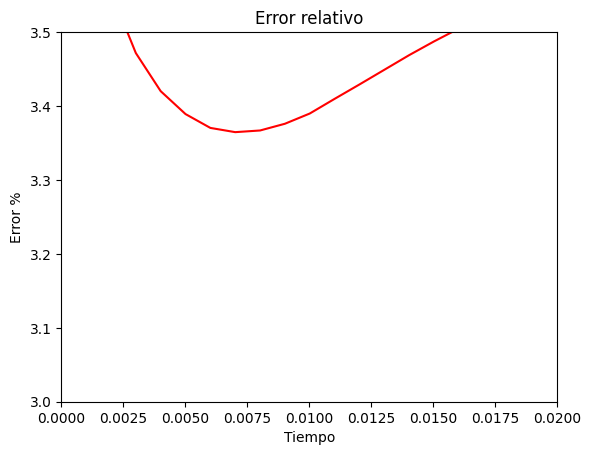

In [ ]:
error1, t = computo_error(diferenciasfinitas, piml, Ntimes=500)
error2, t = computo_error(diferenciasfinitas, piml1, Ntimes=500)

plt.plot()
#plt.plot(t,error1)
plt.plot(t,error2,'-',color='red')
plt.xlabel('Tiempo')
plt.ylabel('Error %')
plt.title('Error relativo')
#plt.legend()
plt.savefig('error_relativo_pinn.jpg')
plt.xlim(0.0,0.02)
plt.ylim(3,3.5)
plt.show()

In [ ]:
maxError1= np.max(error1)
maxError2= np.max(error2)
np.min(error2)

3.364683685419094

In [ ]:
eij1 = computo_error_por_sitio(diferenciasfinitas, piml)
eij2 = computo_error_por_sitio(diferenciasfinitas, piml1)
dimZ=np.shape(eij2)[0]
X, Y = np.meshgrid(np.arange(0, 40), np.arange(0, 40))
t = np.linspace(0, 0.5, 500)
t_tensor = np.tile(t[:, np.newaxis, np.newaxis], (1, 40, 40))  # Dimensión resultante (500, 40, 40)

In [ ]:
# params 1
plot3d_error(eij1, maxError1,X, Y,  t_tensor)

In [ ]:
# params 2
plot3d_error(eij2, maxError2,X, Y,  t_tensor)

#===============================================================

In [ ]:
mse1 = []
mse2 = []
for i in range(0,500):
  error_t= np.sum(diferenciasfinitas[i]-piml[i])**2
  error_prom_t= error_t/500
  mse1.append(error_prom_t)

In [ ]:
for k in range(0,500):
  error_t1= np.sum(diferenciasfinitas[k]-piml1[k])**2
  error_prom_t1= error_t1/500
  mse2.append(error_prom_t1)

In [ ]:
ep1= []
ep2= []
for j in range(0,500):
  error_t1=np.abs((piml[j]-diferenciasfinitas[j])/diferenciasfinitas[j])*100
  error_prom_t1= np.sum(error_t1)/500
  ep1.append(error_prom_t1)

In [ ]:
for l in range(0,500):
  error_t1=np.abs((piml1[l]-diferenciasfinitas[l])/diferenciasfinitas[l])*100
  error_prom_t1= np.sum(error_t1)/500
  ep2.append(error_prom_t1)

In [ ]:
t= np.linspace(0,500,500)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(t,mse1,'*')
plt.xlabel('Tiempo')
plt.ylabel('Error cuadrático medio parámetros 1')
#plt.title('Error')

#plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
plt.plot(t,mse2,'*')
plt.xlabel('Tiempo')
plt.ylabel('Error cuadrático medio parámetros 2')
#plt.title('Error porcentual')

plt.subplot(2,2,3)
plt.plot(t,ep1,'*')
plt.xlabel('Tiempo')
plt.ylabel('Error porcentual medio parámetros 1')
#plt.title('Error porcentual')

plt.subplot(2,2,4)
plt.plot(t,ep2,'*')
plt.xlabel('Tiempo')
plt.ylabel('Error porcentual medio parámetros 2')
#plt.title('Error porcentual')
plt.show()

In [ ]:
error = np.abs((piml[0]-diferenciasfinitas[0])/diferenciasfinitas[0])*100
error1 = np.abs((piml1[0]-diferenciasfinitas[0])/diferenciasfinitas[0])*100

In [ ]:
error_tf= np.abs((piml[499]-diferenciasfinitas[499])/diferenciasfinitas[499])*100
error_tf1= np.abs((piml1[499]-diferenciasfinitas[499])/diferenciasfinitas[499])*100

In [ ]:
x= np.linspace(0,2,40)
y = np.linspace(0,2,40)

In [ ]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,piml[499],cmap='jet')
ax.plot_surface(X,Y,diferenciasfinitas[499],cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

In [ ]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,piml1[499],cmap='jet')
ax.plot_surface(X,Y,diferenciasfinitas[499],cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

im0 = axes[0].imshow(error, cmap='viridis', interpolation='nearest', extent=[0, 2, 0, 2], origin='lower', aspect='auto')
axes[0].set_title('Error para el tiempo cero')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
fig.colorbar(im0, ax=axes[0])


im1 = axes[1].imshow(error_tf, cmap='viridis', interpolation='nearest', extent=[0, 2, 0, 2], origin='lower', aspect='auto')
axes[1].set_title('Error para el tiempo final')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

im0 = axes[0].imshow(error1, cmap='viridis', interpolation='nearest', extent=[0, 2, 0, 2], origin='lower', aspect='auto')
axes[0].set_title('Error para el tiempo cero')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
fig.colorbar(im0, ax=axes[0])


im1 = axes[1].imshow(error_tf1, cmap='viridis', interpolation='nearest', extent=[0, 2, 0, 2], origin='lower', aspect='auto')
axes[1].set_title('Error para el tiempo final')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
pip install -U kaleido

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Dimensiones de la malla
nx, ny = 40,40
X, Y = np.meshgrid(np.linspace(0, 2, nx), np.linspace(0, 2, ny))
tiempos_muestreados = np.linspace(0, 499, 6, dtype=int)  # Tiempos a visualizar

# Crear figura interactiva
fig = go.Figure()

# Agregar planos de evolución temporal de la temperatura
for t_index in range(6):  # 10 pasos de tiempo
    fig.add_trace(
        go.Surface(
            x=X,
            y=np.full_like(X, t_index),
            z=Y,  # Altura = tiempo
            surfacecolor=piml1[t_index],  # Valores de temperatura
            #colorscale=[[0, 'blue'], [0.5, 'white'], [1, 'red']],
            opacity=0.5,
            showscale=False
        )
    )

# Agregar scatter en tiempos clave
for t_index in tiempos_muestreados:
    fig.add_trace(go.Scatter3d(
        x=X.flatten(), y=np.full_like(X.flatten(), t_index), z=Y.flatten(),
        mode='markers',
        marker=dict(size=3, color=piml1[t_index].flatten()), #colorscale=[[0, 'blue'], [0.5, 'white'], [1, 'red']]),
        name=f"t = {t_index/1000}"
    ))

# Configurar diseño del gráfico
fig.update_layout(
    title="Evolución de u y v en 3D con Scatter",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Tiempo",
        zaxis_title="Y",
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        zaxis=dict(showgrid=True),
        aspectratio=dict(x=1, y=2, z=1)
    ),
    scene_camera=dict(
        eye=dict(x=2, y=-1.3, z=1)
      )  # Ajusta el ángulo de visión
)

# Mostrar la figura
fig.show()

fig.write_image("sol_3D_pinn.jpg",scale=2)   # JPG